In [1]:
import os, glob, msgpack
import numpy as np
import xarray as xr
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt

In [66]:
fns_upd = sorted(glob.glob("/ourdisk/hpc/ai2es/tornado/wofs-preds-2023-update-msgpk/20230512/0030/wofs_sparse_prob_2023051300**.msgpk"))
fns_org = sorted(glob.glob(\))

In [ ]:
dictionary comprehension

In [105]:
variables = ["COMPOSITE_REFL_10CM", "ML_PREDICTED_TOR", "UP_HELI_MAX"]
results = {"org": {v:{} for v in variables},
           "upd": {v:{} for v in variables}}

for fileset in [fns_upd, fns_org]:
    if "update" in fileset[0]:
        version = "upd"
    else:
        version = "org"
    for fn in fileset:
        print(fn)
        fn_id = fn.split("prob_")[1].split(".msgpk")[0]
        fcst_time = fn_id[8:12]
        var = fn_id.split("00_")[1]
    
        results[version][var][fcst_time] = {}
        
        with open(fn, "rb") as fn_open:
            fn_byte = fn_open.read()
        fn_unpacked = msgpack.unpackb(fn_byte)

        for mem in [k for k in fn_unpacked.keys() if k not in ["se_coords"]]:
            if fn_unpacked[mem]['values']==[]:
                np_mem = np.array([])
            else:
                csr_mem = csr_matrix((fn_unpacked[mem]['values'],
                                     (fn_unpacked[mem]['rows'], fn_unpacked[mem]['columns'])),
                                     shape=(300,300))
                np_mem = csr_mem.toarray()
            results[version][var][fcst_time][mem] = np_mem

/ourdisk/hpc/ai2es/tornado/wofs-preds-2023-update-msgpk/20230512/0030/wofs_sparse_prob_20230513003000_COMPOSITE_REFL_10CM.msgpk
/ourdisk/hpc/ai2es/tornado/wofs-preds-2023-update-msgpk/20230512/0030/wofs_sparse_prob_20230513003000_ML_PREDICTED_TOR.msgpk
/ourdisk/hpc/ai2es/tornado/wofs-preds-2023-update-msgpk/20230512/0030/wofs_sparse_prob_20230513003000_UP_HELI_MAX.msgpk
/ourdisk/hpc/ai2es/tornado/wofs-preds-2023-update-msgpk/20230512/0030/wofs_sparse_prob_20230513003500_COMPOSITE_REFL_10CM.msgpk
/ourdisk/hpc/ai2es/tornado/wofs-preds-2023-update-msgpk/20230512/0030/wofs_sparse_prob_20230513003500_ML_PREDICTED_TOR.msgpk
/ourdisk/hpc/ai2es/tornado/wofs-preds-2023-update-msgpk/20230512/0030/wofs_sparse_prob_20230513003500_UP_HELI_MAX.msgpk
/ourdisk/hpc/ai2es/tornado/wofs-preds-2023-update-msgpk/20230512/0030/wofs_sparse_prob_20230513004000_COMPOSITE_REFL_10CM.msgpk
/ourdisk/hpc/ai2es/tornado/wofs-preds-2023-update-msgpk/20230512/0030/wofs_sparse_prob_20230513004000_ML_PREDICTED_TOR.msgpk
/

In [106]:
for mem in results['org']['ML_PREDICTED_TOR']['0030'].keys():
    print((results['org']['ML_PREDICTED_TOR']['0030'][mem]==results['upd']['ML_PREDICTED_TOR']['0030'][mem]).all())

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


COMPOSITE_REFL_10CM


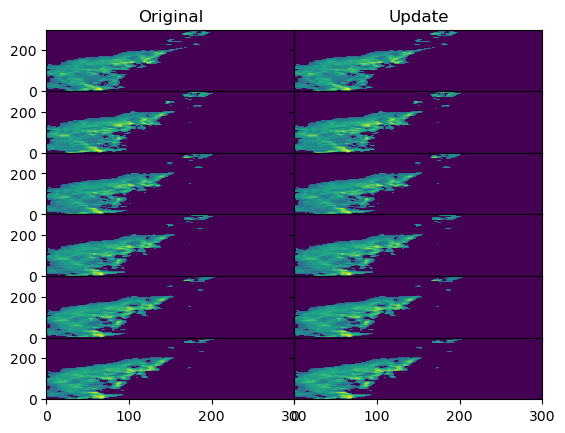

ML_PREDICTED_TOR


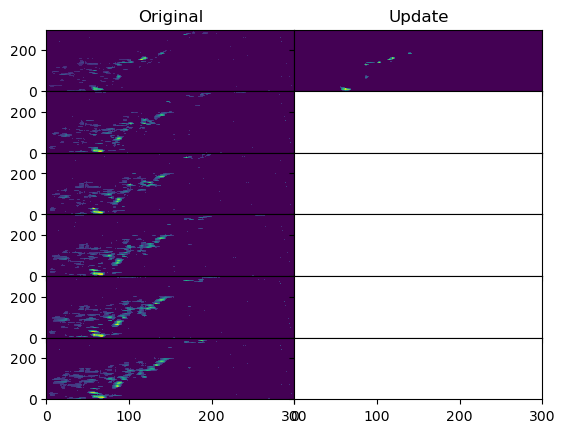

UP_HELI_MAX


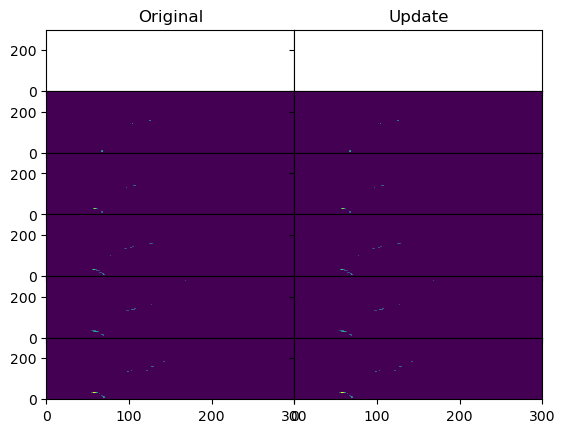

In [107]:
for var in results['org'].keys():
    print(var)
    fig, axs = plt.subplots(len(results['org'][var].keys()), 2, sharex=True, sharey=True)
    fig.subplots_adjust(hspace=0)
    fig.subplots_adjust(wspace=0)
    for i, fcst in enumerate(results['org'][var].keys()):
        axs[0, 0].set_title('Original')
        if len(results['org'][var][fcst]['MEM_mean'].shape)==1:
            pass
        else:
            axs[i, 0].pcolormesh(results['org'][var][fcst]['MEM_mean'])
    for i, fcst in enumerate(results['upd'][var].keys()):
        axs[0, 1].set_title('Update')
        if len(results['upd'][var][fcst]['MEM_mean'].shape)==1:
            pass
        else:
            axs[i, 1].pcolormesh(results['upd'][var][fcst]['MEM_mean'])
    plt.show()

ValueError: operands could not be broadcast together with shapes (297,297) (297,178) 

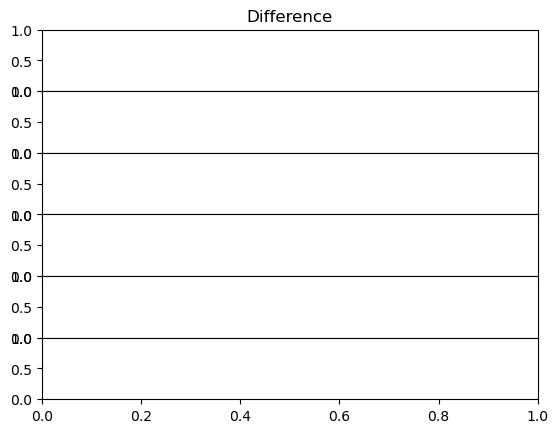

In [97]:

fig, axs = plt.subplots(len(results['org']['ML_PREDICTED_TOR'].keys()), 1, sharex=True, sharey=True)
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
for i, fcst in enumerate(results['org']['ML_PREDICTED_TOR'].keys()):
    axs[0].set_title('Difference')
    diff = results['org']['ML_PREDICTED_TOR'][fcst]['MEM_mean'] - results['upd']['ML_PREDICTED_TOR'][fcst]['MEM_mean']
    axs[i].pcolormesh(diff)
    print(diff.sum().sum())
plt.show()